In [7]:

import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
df = pd.read_csv('/Users/someone./Documents/Github/github.com/Som3sh/Python/Paper/Data/revenue_data.csv', parse_dates=['Date'], index_col='Date')




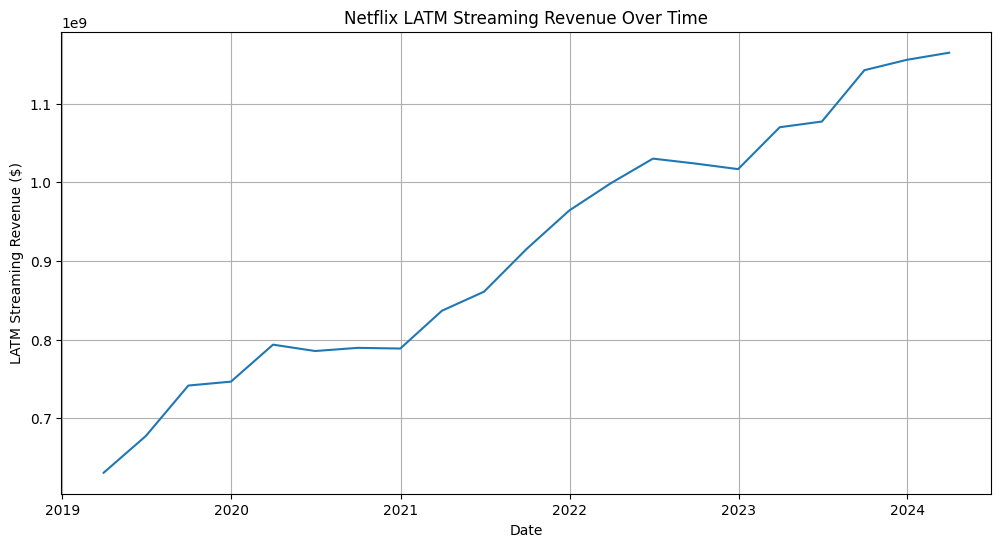

In [3]:
# Sort the index to ensure chronological order
df = df.sort_index()

# Plot LATM Streaming Revenue over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LATM Streaming Revenue'])
plt.title('Netflix LATM Streaming Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('LATM Streaming Revenue ($)')
plt.grid(True)
plt.show()

In [8]:

# Prepare data for ARIMA model
revenue_data = df['LATM Streaming Revenue']

# Fit ARIMA model
model = ARIMA(revenue_data, order=(1,1,1))
results = model.fit()

# Generate predictions for the next 8 quarters
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=3), periods=8, freq='Q')
future_predictions = results.forecast(steps=8)

# Create a DataFrame with the predictions
future_df = pd.DataFrame({'Predicted Revenue': future_predictions}, index=future_dates)


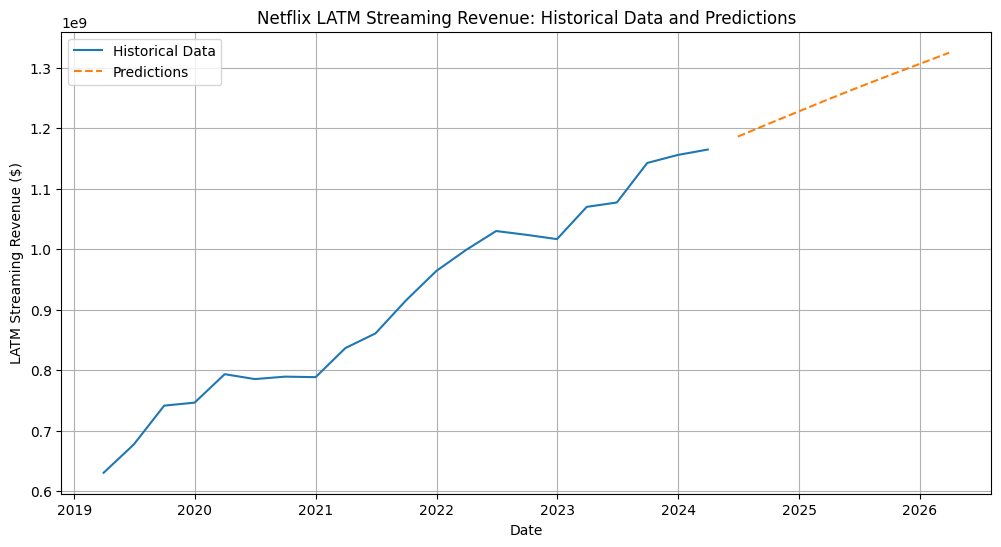

In [5]:
# Visualize historical data and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['LATM Streaming Revenue'], label='Historical Data')
plt.plot(future_df.index, future_df['Predicted Revenue'], label='Predictions', linestyle='--')
plt.title('Netflix LATM Streaming Revenue: Historical Data and Predictions')
plt.xlabel('Date')
plt.ylabel('LATM Streaming Revenue ($)')
plt.legend()
plt.grid(True)
plt.show()

In [6]:

# Print predictions
print("Predicted LATM Streaming Revenue for the next 8 quarters:")
print(future_df)

# Calculate percentage change from last actual revenue
last_actual_revenue = df['LATM Streaming Revenue'].iloc[-1]
future_df['Percentage Change'] = (future_df['Predicted Revenue'] - last_actual_revenue) / last_actual_revenue * 100

print("\nPredictions with percentage change from last actual revenue:")
print(future_df)

Predicted LATM Streaming Revenue for the next 8 quarters:
            Predicted Revenue
2024-06-30       1.186423e+09
2024-09-30       1.207423e+09
2024-12-31       1.228016e+09
2025-03-31       1.248210e+09
2025-06-30       1.268012e+09
2025-09-30       1.287431e+09
2025-12-31       1.306474e+09
2026-03-31       1.325147e+09

Predictions with percentage change from last actual revenue:
            Predicted Revenue  Percentage Change
2024-06-30       1.186423e+09           1.838168
2024-09-30       1.207423e+09           3.640717
2024-12-31       1.228016e+09           5.408340
2025-03-31       1.248210e+09           7.141712
2025-06-30       1.268012e+09           8.841496
2025-09-30       1.287431e+09          10.508345
2025-12-31       1.306474e+09          12.142895
2026-03-31       1.325147e+09          13.745774
